# Fingerprint descriptors

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/acetylcholinesterase-QSAR/notebooks/4.2-Data-Bias-Fingerprints-descriptors.ipynb)

## 1. Load Libraries

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.2 MB/s eta 0:00:00


In [ ]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.1 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176720 sha256=41c0a47401d585ddf0840ce1b1c31401d3948ee7c301e65358f298ccda3c8b2d
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.ML.Cluster import Butina
from mordred import Calculator, descriptors
import mols2grid
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Load Data

In [ ]:
train = PandasTools.LoadSDF('/content/molecules_train.sdf', molColName='Molecule')

In [ ]:
train.drop(['Murcko Scaffold', '#Atoms MS', 'Cluster'], axis=1, inplace=True)

,molecule_chembl_id,curated_smiles,class,Label,pIC50,ID,Molecule
0,CHEMBL4468781,COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...,active,1,5.30103,,
1,CHEMBL199670,O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...,active,1,5.30103,,
2,CHEMBL199861,O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,1,5.30103,,
3,CHEMBL4556734,O=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,active,1,5.30103,,
4,CHEMBL199585,O=C(CCCCCCNc1c2c(nc3cc(Cl)cc(Cl)c13)CCCC2)NCCc...,active,1,5.30103,,
...,...,...,...,...,...,...,...
3948,CHEMBL3597003,CCOC(=O)C1C(=Nc2ccccc2)CC(c2ccc(C)cc2)N(c2cccc...,inactive,0,-6.746634,,
3949,CHEMBL4851865,Cc1cccc(CN2CCC(CNC(=O)c3cncc(NC(=O)c4ccnc(NC(=...,inactive,0,-6.80373,,
3950,CHEMBL102637,CCSC(=O)OCC[N+](C)(C)C,inactive,0,-7.0,,
3951,CHEMBL3597055,COC(=O)C1C(=Nc2ccc(F)cc2)CC(c2ccccc2)N(c2ccc(F...,inactive,0,-7.179552,,

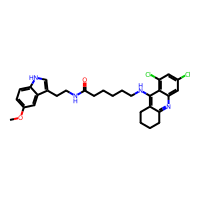
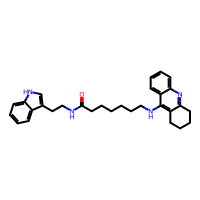
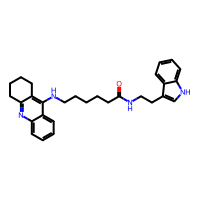
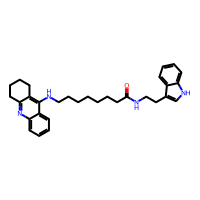
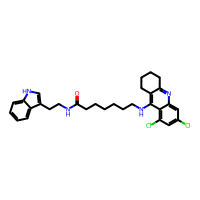
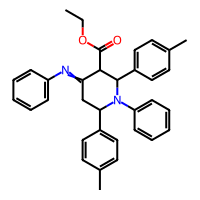
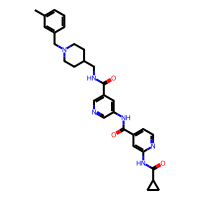
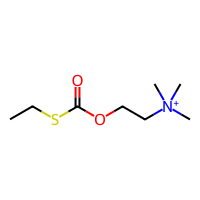
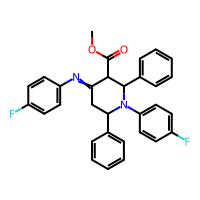
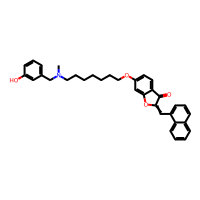

In [ ]:
train

In [ ]:
test = PandasTools.LoadSDF('/content/molecules_test.sdf', molColName='Molecule')

In [ ]:
test.drop(['Murcko Scaffold', '#Atoms MS', 'Cluster'], axis=1, inplace=True)

,molecule_chembl_id,curated_smiles,class,Label,pIC50,ID,Molecule
0,CHEMBL4469239,S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...,active,1,5.30103,,
1,CHEMBL4780352,COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...,active,1,5.30103,,
2,CHEMBL4467284,S=C(CCCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c...,active,1,5.30103,,
3,CHEMBL3585776,COc1ccc(C(C)NS(=O)(=O)NC(=O)OCc2ccccc2)cc1,active,1,1.571056,,
4,CHEMBL3585775,COc1ccccc1C(C)NS(=O)(=O)NC(=O)OCc1ccccc1,active,1,1.571056,,
...,...,...,...,...,...,...,...
1505,CHEMBL4763394,ON=Cc1cc(Cl)cc(CNc2ccc(N3CCOCC3)c(F)c2)c1O,inactive,0,-6.772102,,
1506,CHEMBL335439,C[N+]1(C)CCOC(O)(c2ccc(Cl)cc2)C1,inactive,0,-6.91,,
1507,CHEMBL1276594,O=P(NN1CCOCC1)(NN1CCOCC1)Oc1ccccc1,inactive,0,-6.980003,,
1508,CHEMBL334938,C[N+]1(C)CCOC(O)(c2ccc(C#N)cc2)C1,inactive,0,-7.064,,

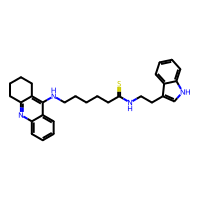
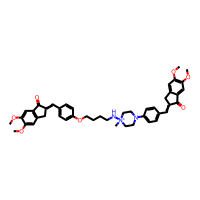
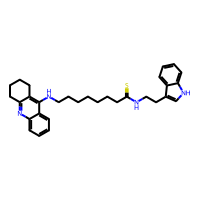
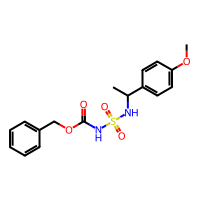
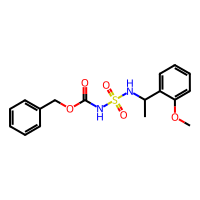
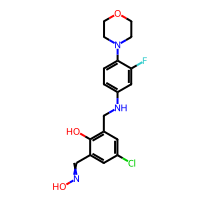
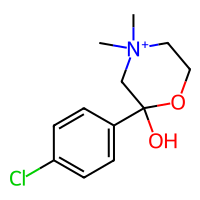
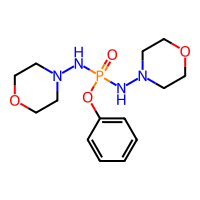
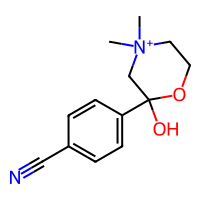
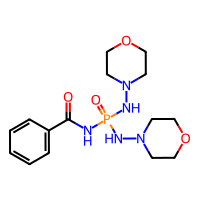

In [ ]:
test

In [ ]:
train['Label'] = train['Label'].astype('int')

In [ ]:
train['pIC50'] = train['pIC50'].astype('float64')

In [ ]:
test['Label'] = test['Label'].astype('int')

In [ ]:
test['pIC50'] = test['pIC50'].astype('float64')

## 3. Modred descriptors

In [ ]:
def mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]

    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors_train = mordred_descriptors(train['curated_smiles'])

  2%|▏         | 79/3953 [00:50<58:40,  1.10it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  4%|▎         | 146/3953 [01:21<28:41,  2.21it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 3953/3953 [27:35<00:00,  2.39it/s]


In [ ]:
mordred_descriptors_test = mordred_descriptors(test['curated_smiles'])

  0%|          | 2/1510 [00:02<26:28,  1.05s/it]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  3%|▎         | 40/1510 [00:19<20:32,  1.19it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1510/1510 [10:38<00:00,  2.36it/s]


In [ ]:
mordred_descriptors_train.shape

(3953, 1826)

In [ ]:
mordred_descriptors_test.shape

(1510, 1826)

In [ ]:
mordred_descriptors_train.set_index(train['molecule_chembl_id'], inplace=True)
mordred_descriptors_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4468781,29.743573,20.853392,0,0,49.749926,2.507041,5.014083,49.749926,1.309209,4.569197,...,10.575283,88.890972,552.205882,7.669526,5985,61,200.0,236.0,10.833333,8.444444
CHEMBL199670,27.443914,18.791717,0,0,46.929992,2.474610,4.949221,46.929992,1.340857,4.488261,...,10.416281,85.301459,468.288912,6.595618,4985,53,182.0,213.0,8.250000,7.833333
CHEMBL199861,26.736807,18.511135,0,0,45.767153,2.474615,4.949230,45.767153,1.346093,4.462304,...,10.408707,84.220244,454.273262,6.680489,4478,52,178.0,209.0,8.000000,7.583333
CHEMBL4556734,28.151020,19.067648,0,0,48.308273,2.474609,4.949218,48.308273,1.341896,4.513561,...,10.423798,86.381173,482.304562,6.517629,5527,54,186.0,217.0,8.500000,8.083333
CHEMBL199585,29.036467,20.127503,0,0,48.461504,2.507038,5.014076,48.461504,1.309770,4.542908,...,10.525488,87.700417,536.210967,7.552267,5677,58,194.0,228.0,9.972222,8.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3597003,29.703133,22.914464,0,0,49.904383,2.546747,5.093495,49.904383,1.313273,4.568376,...,10.600751,75.000957,502.262028,6.975862,4025,64,200.0,237.0,10.833333,8.472222
CHEMBL4851865,30.721830,20.835955,0,1,50.894785,2.363653,4.704852,50.894785,1.304994,4.604934,...,10.441646,94.155646,526.269239,7.209168,6489,57,204.0,235.0,11.083333,8.500000
CHEMBL102637,8.364320,8.238109,0,1,12.704559,2.139256,4.278511,12.704559,1.058713,3.321946,...,8.618485,41.029486,192.105276,6.403509,240,10,50.0,49.0,6.423611,2.791667


In [ ]:
mordred_descriptors_test.set_index(test['molecule_chembl_id'], inplace=True)
mordred_descriptors_test

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4469239,26.736807,18.511135,0,0,45.767153,2.474615,4.949230,45.767153,1.346093,4.462304,...,10.408707,84.220244,470.250418,6.915447,4478,52,178.0,209.0,8.000000,7.583333
CHEMBL4780352,43.147251,26.350299,0,1,72.557999,2.487841,4.869597,72.557999,1.319236,4.942597,...,10.976491,110.233471,744.364327,7.089184,18696,93,296.0,353.0,16.451389,12.208333
CHEMBL4467284,28.151020,19.067648,0,0,48.308273,2.474609,4.949218,48.308273,1.341896,4.513561,...,10.423798,86.381173,498.281718,6.733537,5527,54,186.0,217.0,8.500000,8.083333
CHEMBL3585776,18.880953,15.276257,0,0,31.089588,2.327847,4.655694,31.089588,1.243584,4.115234,...,9.851826,59.091121,364.109293,8.091318,1784,33,122.0,135.0,9.118056,5.611111
CHEMBL3585775,18.840513,15.719229,0,0,31.095303,2.351734,4.703469,31.095303,1.243812,4.115409,...,9.893589,59.162205,364.109293,8.091318,1716,34,122.0,136.0,9.118056,5.638889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4763394,19.965399,15.423032,0,0,33.478472,2.380194,4.760389,33.478472,1.287634,4.175793,...,10.088597,60.761483,379.109897,8.424664,1873,40,132.0,153.0,8.388889,5.861111
CHEMBL335439,12.545351,10.792531,0,1,19.083647,2.449490,4.898979,19.083647,1.192728,3.708037,...,9.873801,49.041729,242.094233,7.336189,416,24,86.0,99.0,6.347222,3.333333
CHEMBL1276594,17.836588,14.286218,0,0,29.859635,2.370239,4.740478,29.859635,1.298245,4.056889,...,9.843260,56.915029,342.145692,7.437950,1204,30,116.0,130.0,5.895833,5.125000


In [ ]:
mordred_descriptors_train.to_csv('mordred_descriptors_train.csv', index=True)

In [ ]:
mordred_descriptors_test.to_csv('mordred_descriptors_test.csv', index=True)

### Missing Descriptors

In [ ]:
non_numeric_columns_train = list(mordred_descriptors_train.select_dtypes(exclude=['number']))

In [ ]:
non_numeric_columns_train[:16]

['AATS5dv',
 'AATS6dv',
 'AATS7dv',
 'AATS8dv',
 'AATS5d',
 'AATS6d',
 'AATS7d',
 'AATS8d',
 'AATS5s',
 'AATS6s',
 'AATS7s',
 'AATS8s',
 'AATS5Z',
 'AATS6Z',
 'AATS7Z',
 'AATS8Z']

In [ ]:
len(non_numeric_columns_train)

632

In [ ]:
mordred_numeric_train = mordred_descriptors_train.drop(columns=non_numeric_columns_train)

In [ ]:
len(mordred_numeric_train.columns)

1194

In [ ]:
mordred_numeric_test = mordred_descriptors_test.drop(columns=non_numeric_columns_train)

In [ ]:
len(mordred_numeric_train.columns)

1194

### Correlation-based Variable Reduction

In [ ]:
corr_matrix_train = mordred_numeric_train.corr()
corr_matrix_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
ABC,1.000000,0.965812,-0.053139,0.089829,0.996263,0.434732,0.480852,0.996263,0.396934,0.970939,...,0.837446,0.852487,0.982220,-0.032834,0.884419,0.937564,0.992408,0.971458,0.829739,0.980703
ABCGG,0.965812,1.000000,-0.033446,0.085409,0.952222,0.537984,0.562423,0.952222,0.315837,0.943792,...,0.868108,0.869577,0.953696,0.024552,0.811398,0.960919,0.975005,0.971067,0.884611,0.939669
nAcid,-0.053139,-0.033446,1.000000,-0.073613,-0.054270,-0.055047,-0.053920,-0.054270,-0.106855,-0.058401,...,-0.080532,-0.036748,-0.045660,-0.003341,-0.040636,-0.058662,-0.057124,-0.059601,-0.005633,-0.041821
nBase,0.089829,0.085409,-0.073613,1.000000,0.101457,-0.129570,-0.202786,0.101457,-0.003200,0.096230,...,-0.047482,0.143592,0.103855,-0.243656,0.130315,0.018021,0.066684,0.045664,0.098830,0.130161
SpAbs_A,0.996263,0.952222,-0.054270,0.101457,1.000000,0.397696,0.446330,1.000000,0.433571,0.968958,...,0.813305,0.842234,0.979400,-0.054048,0.894137,0.918994,0.982316,0.956669,0.804762,0.988217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,0.937564,0.960919,-0.058662,0.018021,0.918994,0.658730,0.703409,0.918994,0.380929,0.910071,...,0.928426,0.818876,0.905570,0.045375,0.752692,1.000000,0.968820,0.986382,0.820028,0.881878
Zagreb1,0.992408,0.975005,-0.057124,0.066684,0.982316,0.525622,0.564322,0.982316,0.412365,0.964457,...,0.885314,0.868147,0.966143,0.004350,0.843350,0.968820,1.000000,0.993088,0.822227,0.953570
Zagreb2,0.971458,0.971067,-0.059601,0.045664,0.956669,0.607043,0.638101,0.956669,0.427821,0.944811,...,0.917655,0.871144,0.937590,0.035607,0.794194,0.986382,0.993088,1.000000,0.801447,0.916510
mZagreb1,0.829739,0.884611,-0.005633,0.098830,0.804762,0.352435,0.393612,0.804762,-0.077383,0.789975,...,0.680672,0.673202,0.860881,-0.025254,0.782705,0.820028,0.822227,0.801447,1.000000,0.845631


In [ ]:
correlated_columns_train = set()

for col in corr_matrix_train.columns:
    high_corr = corr_matrix_train.index[corr_matrix_train[col].abs() > 0.8].tolist()

    # Add these columns to the set (excluding the column itself)
    correlated_columns_train.update(set(high_corr) - {col})

correlated_columns_train = list(correlated_columns_train)

In [ ]:
len(correlated_columns_train)

953

In [ ]:
mordred_non_corr_train = mordred_numeric_train.drop(columns=correlated_columns_train)
mordred_non_corr_train.shape

(3953, 241)

In [ ]:
mordred_non_corr_train

,nAcid,nBase,VE1_A,nSpiro,nBridgehead,nB,AATS4i,ATSC5dv,ATSC6dv,ATSC8dv,...,n9FAHRing,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4468781,0,0,3.960664,0,0,0,159.496714,-111.776025,-119.364540,44.303612,...,0,0.065134,0.047814,0.039922,0.023478,0.016611,0.010863,0.008414,0.006963,0.007337
CHEMBL199670,0,0,3.793369,0,0,0,160.711564,-120.228923,-52.724063,-5.502876,...,0,0.064103,0.039701,0.029409,0.014824,0.011958,0.009629,0.005465,0.004549,0.004576
CHEMBL199861,0,0,3.799305,0,0,0,160.526614,-128.211073,-53.930796,16.979239,...,0,0.065359,0.040465,0.030048,0.015194,0.012290,0.008953,0.005660,0.006030,0.006247
CHEMBL4556734,0,0,3.790319,0,0,0,160.879353,-112.971512,-48.011687,-24.083272,...,0,0.062893,0.038966,0.028796,0.014471,0.011643,0.009345,0.006106,0.004386,0.003304
CHEMBL199585,0,0,3.955743,0,0,0,160.357118,-116.818679,-61.872742,-20.925938,...,0,0.063492,0.049210,0.034897,0.021214,0.015529,0.011971,0.007134,0.005614,0.004839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3597003,0,0,4.829179,0,0,0,155.712128,53.262346,-23.169753,-183.706790,...,0,0.061303,0.040039,0.040317,0.025194,0.014820,0.011654,0.008492,0.008147,0.006705
CHEMBL4851865,0,1,4.874464,0,0,0,164.972704,64.577407,-64.831300,25.142053,...,0,0.060516,0.040692,0.036155,0.019397,0.015526,0.010850,0.008327,0.006932,0.006377
CHEMBL102637,0,1,3.079951,0,0,0,171.997322,-56.465185,-27.585185,-11.720000,...,0,0.079365,0.062500,0.026667,0.047619,0.015306,0.023438,0.000000,0.000000,0.000000


In [ ]:
mordred_non_corr_test = mordred_numeric_test.drop(columns=correlated_columns_train)
mordred_non_corr_test.shape

(1510, 241)

In [ ]:
mordred_non_corr_test

,nAcid,nBase,VE1_A,nSpiro,nBridgehead,nB,AATS4i,ATSC5dv,ATSC6dv,ATSC8dv,...,n9FAHRing,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4469239,0,0,3.799305,0,0,0,159.102807,-109.399846,-64.755863,5.191465,...,0,0.065359,0.040465,0.030048,0.015194,0.012290,0.008953,0.005660,0.006030,0.006247
CHEMBL4780352,0,1,4.249602,0,0,0,157.417355,61.824490,47.841633,24.553469,...,0,0.076628,0.045326,0.038862,0.032870,0.018058,0.010193,0.011732,0.006769,0.005921
CHEMBL4467284,0,0,3.790319,0,0,0,159.587651,-96.849444,-60.687931,-18.428537,...,0,0.062893,0.038966,0.028796,0.014471,0.011643,0.009345,0.006106,0.004386,0.003304
CHEMBL3585776,0,0,4.184739,0,0,0,161.647762,20.078793,-45.908093,17.976626,...,0,0.076190,0.051136,0.039140,0.031893,0.018957,0.016806,0.009540,0.009375,0.006061
CHEMBL3585775,0,0,4.071157,0,0,0,161.399647,-57.911166,52.457284,-68.223539,...,0,0.076190,0.060662,0.035686,0.031609,0.019738,0.014957,0.009226,0.007674,0.006494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4763394,0,0,4.694927,0,0,0,161.136352,-12.025008,-27.149672,49.083341,...,0,0.076023,0.050000,0.043580,0.022352,0.019471,0.011140,0.010445,0.008625,0.008038
CHEMBL335439,0,1,3.615521,0,0,0,165.895504,-82.824700,-25.237980,6.148103,...,0,0.102564,0.067708,0.047333,0.042163,0.018404,0.032986,0.006803,0.000000,0.000000
CHEMBL1276594,0,0,4.185151,0,0,0,165.821101,-67.079162,-116.619244,22.606222,...,0,0.040404,0.056250,0.031111,0.017045,0.014620,0.000694,0.004031,0.005625,0.000000


In [ ]:
mordred_non_corr_train.to_csv('reduced_descriptors_train.csv', index=True)

In [1]:
mordred_non_corr_test.to_csv('reduced_descriptors_test.csv', index=True)

NameError: name 'mordred_non_corr_test' is not defined

## 4. Morgan Fingerprints

### 4.1 Radius = 2

In [ ]:
Morgan_fpts_r2 = []
bitInfos = []
fpts_objects = []

for mol in train['Molecule']:
    bitInfo = {}
    fpts = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitInfo)
    fpts_objects.append(fpts)
    mfpts = np.array(fpts)
    Morgan_fpts_r2.append((mfpts))
    bitInfos.append(bitInfo)

In [ ]:
print(list(fpts_objects[0].GetOnBits()))

[4, 33, 41, 60, 64, 73, 74, 80, 90, 119, 128, 185, 197, 216, 219, 243, 276, 280, 304, 310, 322, 325, 328, 333, 356, 361, 364, 366, 367, 378, 381, 392, 465, 476, 482, 512, 540, 557, 561, 565, 592, 597, 650, 659, 667, 694, 695, 712, 714, 718, 723, 726, 728, 776, 781, 806, 807, 828, 831, 841, 849, 855, 875, 887, 893, 913, 915, 924, 926, 948, 960, 984]


In [ ]:
np.nonzero(Morgan_fpts_r2[0])

(array([  4,  33,  41,  60,  64,  73,  74,  80,  90, 119, 128, 185, 197,
        216, 219, 243, 276, 280, 304, 310, 322, 325, 328, 333, 356, 361,
        364, 366, 367, 378, 381, 392, 465, 476, 482, 512, 540, 557, 561,
        565, 592, 597, 650, 659, 667, 694, 695, 712, 714, 718, 723, 726,
        728, 776, 781, 806, 807, 828, 831, 841, 849, 855, 875, 887, 893,
        913, 915, 924, 926, 948, 960, 984]),)

In [ ]:
Morgan_fpts_r2 = np.array(Morgan_fpts_r2)
Morgan_fpts_r2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Morgan_fpts_r2.shape[1]

1024

In [ ]:
morgan_finpr_r2 = pd.DataFrame(Morgan_fpts_r2, columns=['Col_{}'.format(i) for i in range(Morgan_fpts_r2.shape[1])])

In [ ]:
morgan_finpr_r2.set_index(train['molecule_chembl_id'], inplace=True)

In [ ]:
morgan_finpr_r2

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_1014,Col_1015,Col_1016,Col_1017,Col_1018,Col_1019,Col_1020,Col_1021,Col_1022,Col_1023
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4468781,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199670,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199861,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4556734,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199585,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3597003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
CHEMBL4851865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CHEMBL102637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


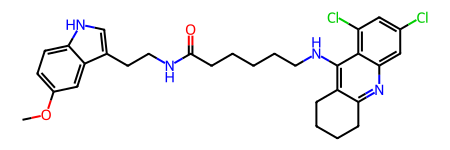

In [ ]:
train['Molecule'][0]

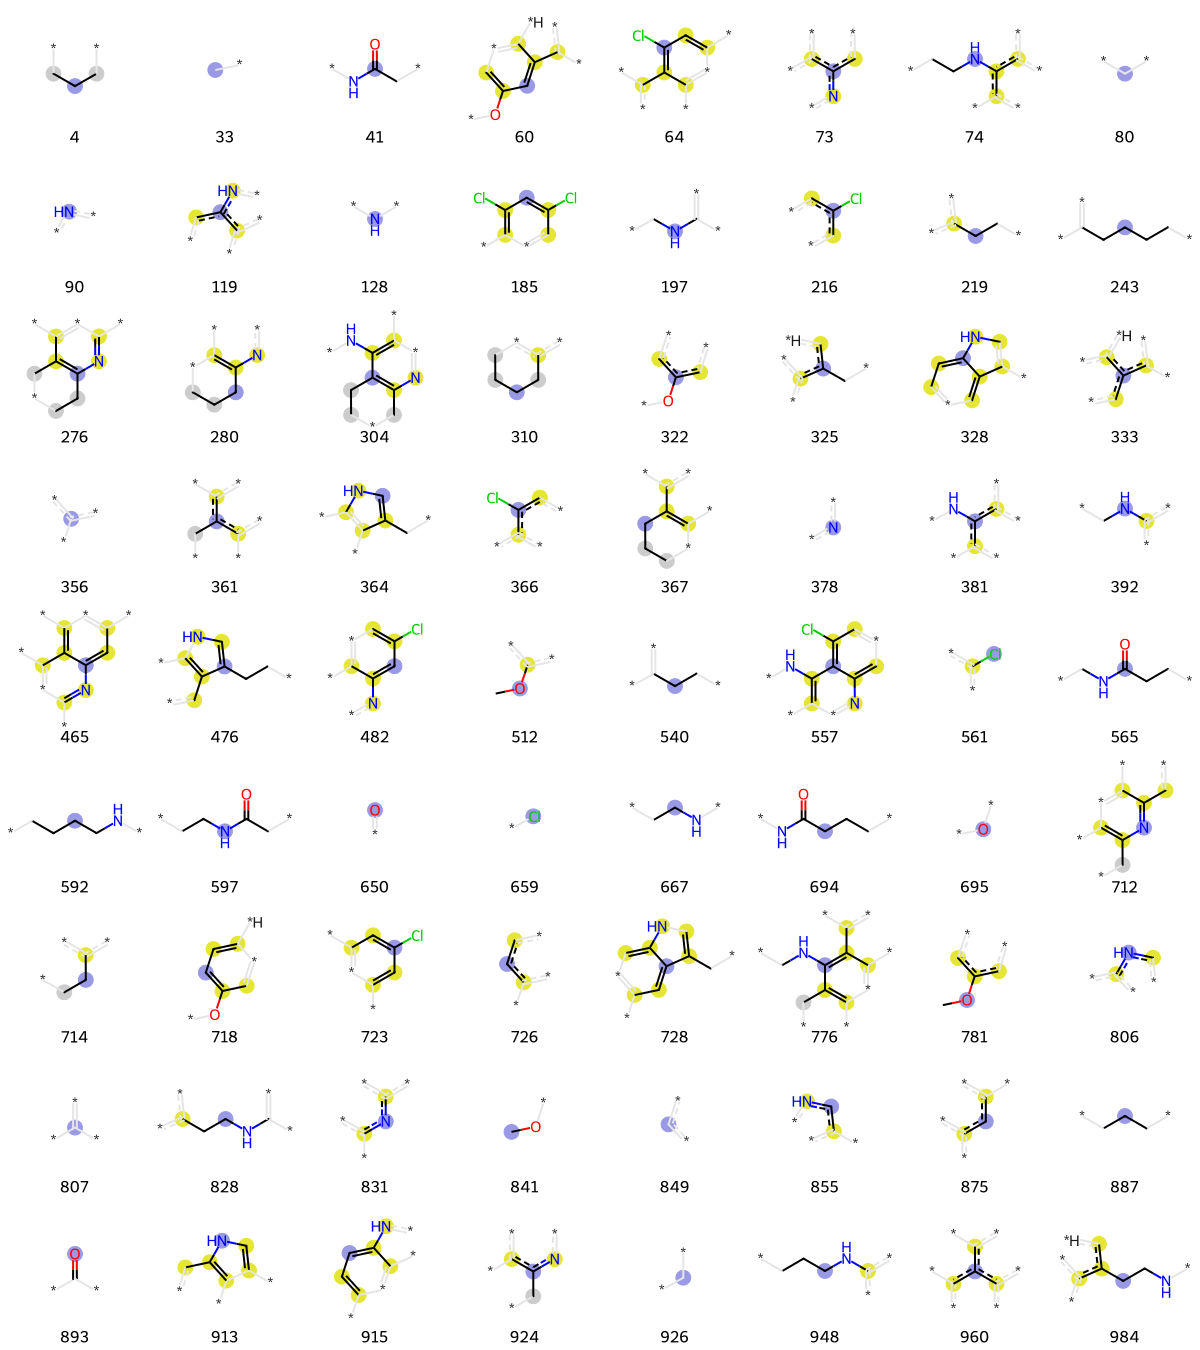

In [ ]:
# Display the fingerprints
prints = [(train['Molecule'][0], x, bitInfos[0]) for x in fpts_objects[0].GetOnBits()]
img=Draw.DrawMorganBits(prints,molsPerRow=8,legends=[str(x) for x in fpts_objects[0].GetOnBits()])
img

In [ ]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 881.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
svg = img.data
svg_filename = "molecules1_morgan_bits_radius_2.svg"
with open(svg_filename, "w") as svg_file:
    svg_file.write(svg)

# 6. Convert svg to pdf
import cairosvg
pdf_filename = svg_filename.replace(".svg", ".pdf")
cairosvg.svg2pdf(url=svg_filename, write_to=pdf_filename)

In [ ]:
morgan_finpr_r2.to_csv('morgan_fnps_radius_2_train.csv', index=True)

### 4.1 Radius = 3

In [ ]:
Morgan_fpts_r3 = []
bitInfos = []
fpts_objects = []

for mol in train['Molecule']:
    bitInfo = {}
    fpts = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024, bitInfo=bitInfo)
    fpts_objects.append(fpts)
    mfpts = np.array(fpts)
    Morgan_fpts_r3.append((mfpts))
    bitInfos.append(bitInfo)

In [ ]:
print(list(fpts_objects[0].GetOnBits()))

[4, 33, 41, 52, 60, 64, 73, 74, 80, 90, 99, 100, 115, 119, 128, 140, 142, 185, 197, 216, 219, 243, 257, 276, 278, 280, 288, 304, 310, 322, 325, 328, 333, 356, 361, 364, 366, 367, 378, 381, 382, 389, 392, 449, 454, 465, 468, 476, 482, 485, 512, 522, 540, 557, 561, 565, 580, 592, 597, 604, 611, 620, 641, 650, 659, 662, 667, 694, 695, 708, 709, 712, 714, 717, 718, 723, 726, 728, 776, 781, 798, 806, 807, 828, 831, 841, 849, 850, 855, 858, 875, 887, 893, 913, 915, 924, 926, 948, 954, 960, 967, 980, 984, 988, 993]


In [ ]:
np.nonzero(Morgan_fpts_r3[0])

(array([  4,  33,  41,  52,  60,  64,  73,  74,  80,  90,  99, 100, 115,
        119, 128, 140, 142, 185, 197, 216, 219, 243, 257, 276, 278, 280,
        288, 304, 310, 322, 325, 328, 333, 356, 361, 364, 366, 367, 378,
        381, 382, 389, 392, 449, 454, 465, 468, 476, 482, 485, 512, 522,
        540, 557, 561, 565, 580, 592, 597, 604, 611, 620, 641, 650, 659,
        662, 667, 694, 695, 708, 709, 712, 714, 717, 718, 723, 726, 728,
        776, 781, 798, 806, 807, 828, 831, 841, 849, 850, 855, 858, 875,
        887, 893, 913, 915, 924, 926, 948, 954, 960, 967, 980, 984, 988,
        993]),)

In [ ]:
Morgan_fpts_r3 = np.array(Morgan_fpts_r3)
Morgan_fpts_r3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
morgan_finpr_r3 = pd.DataFrame(Morgan_fpts_r3, columns=['Col_{}'.format(i) for i in range(Morgan_fpts_r3.shape[1])])

In [ ]:
morgan_finpr_r3.set_index(train['molecule_chembl_id'], inplace=True)

In [ ]:
morgan_finpr_r3

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_1014,Col_1015,Col_1016,Col_1017,Col_1018,Col_1019,Col_1020,Col_1021,Col_1022,Col_1023
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL4468781,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199670,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199861,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4556734,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL199585,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3597003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
CHEMBL4851865,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
CHEMBL102637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


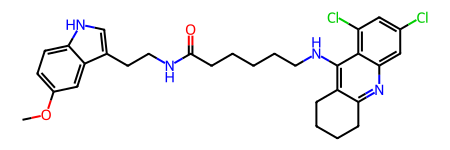

In [ ]:
train['Molecule'][0]

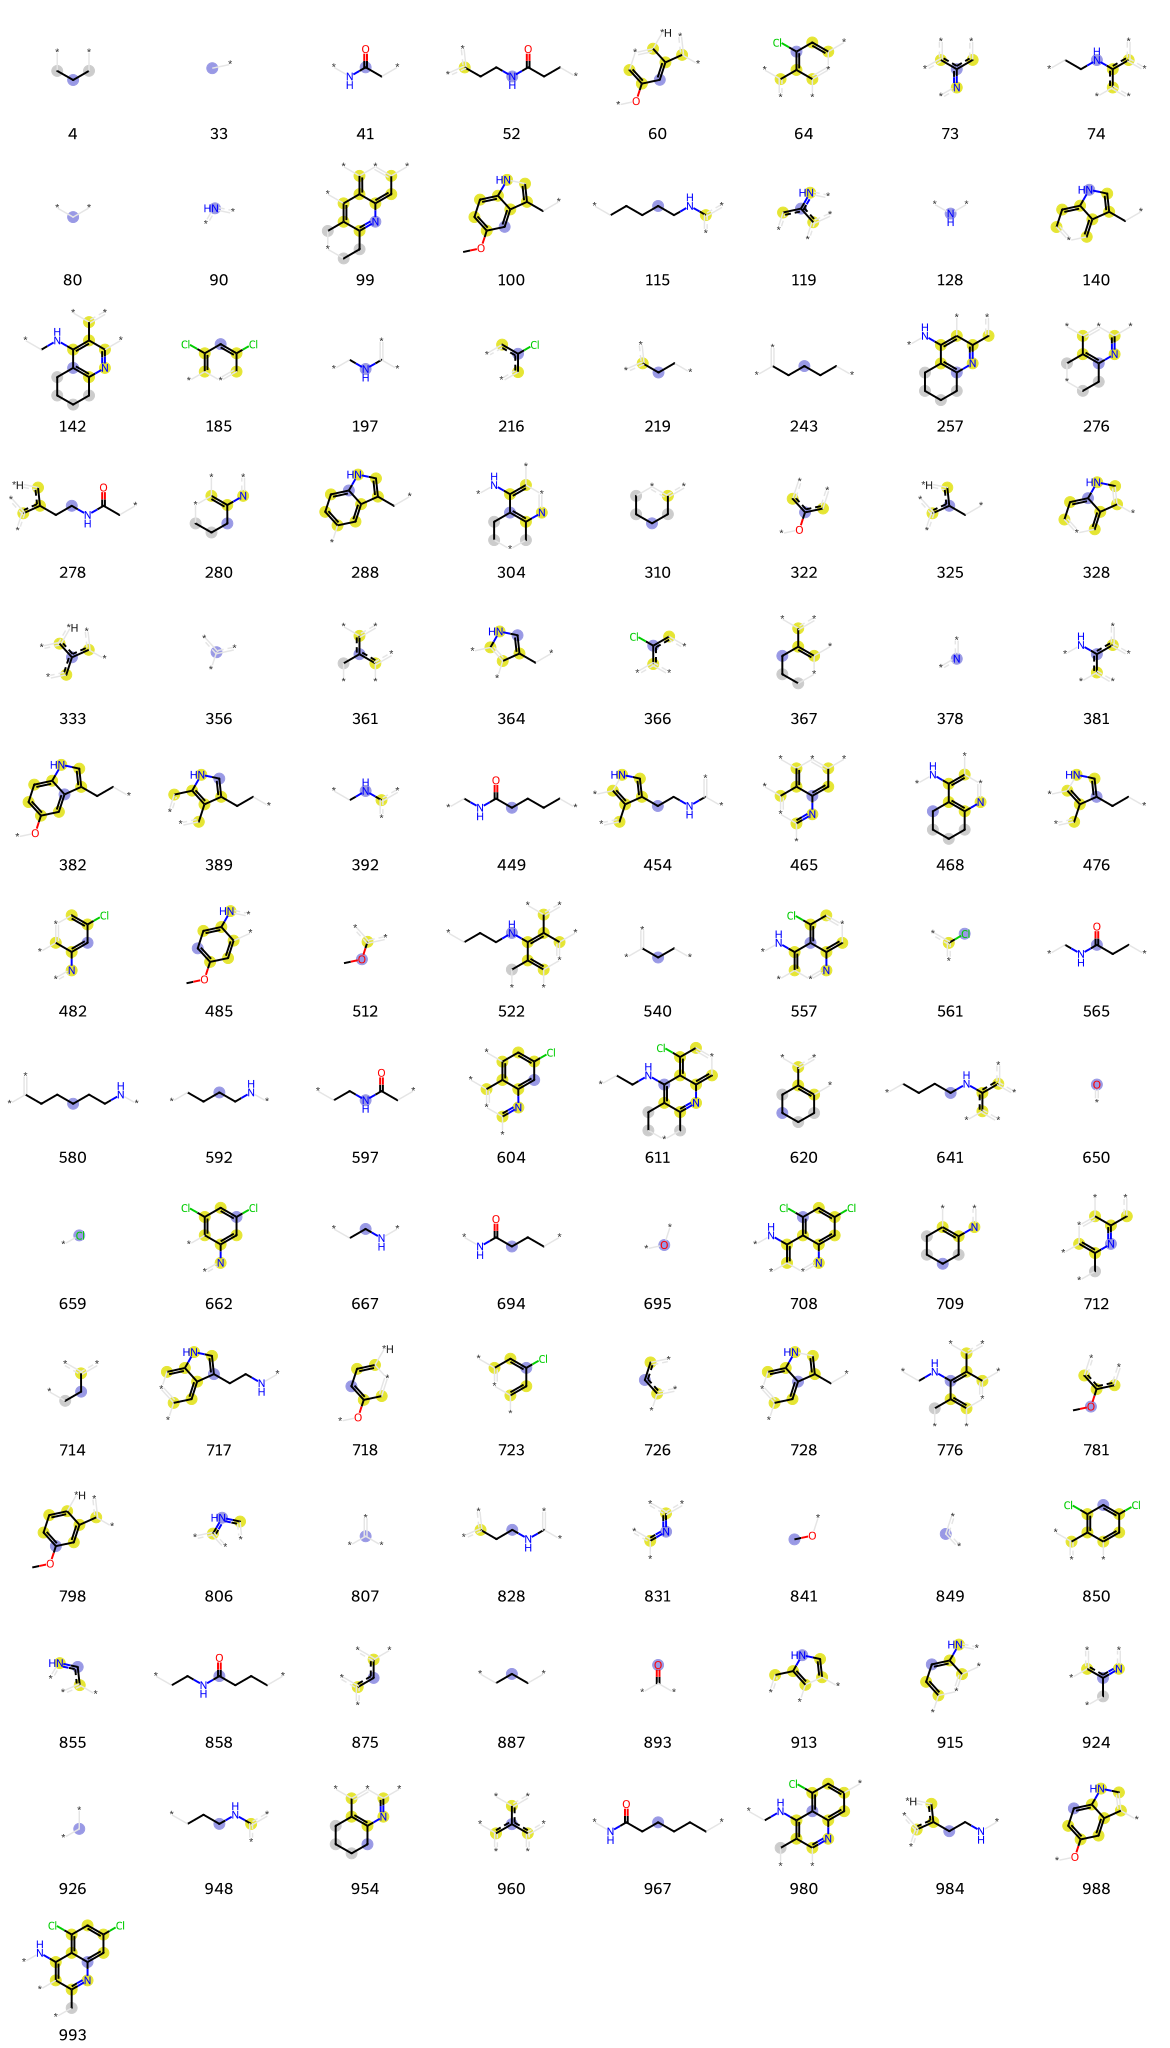

In [ ]:
# Display the fingerprints
prints = [(train['Molecule'][0], x, bitInfos[0]) for x in fpts_objects[0].GetOnBits()]
img=Draw.DrawMorganBits(prints,molsPerRow=8,legends=[str(x) for x in fpts_objects[0].GetOnBits()])
img

In [ ]:
svg = img.data
svg_filename = "molecules1_morgan_bits_radius_3.svg"
with open(svg_filename, "w") as svg_file:
    svg_file.write(svg)

# 6. Convert svg to pdf
import cairosvg
pdf_filename = svg_filename.replace(".svg", ".pdf")
cairosvg.svg2pdf(url=svg_filename, write_to=pdf_filename)

In [ ]:
morgan_finpr_r3.to_csv('morgan_fnps_radius_3_train.csv', index=True)